# Imports

In [2]:
%load_ext autoreload
%autoreload 2
from display_image import ImageDisplay

import os
import sys
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np


# Load Dataset

In [3]:
# Loading training dataset
df_train = pd.read_csv(f'data{os.sep}mnist_train.csv')
print(df_train.shape)

(60000, 785)


In [4]:
# Loading test dataset
df_test = pd.read_csv(f'data{os.sep}mnist_test.csv')
print(df_train.shape)

(60000, 785)


In [5]:
train_labels = df_train.iloc[:, 0].values
train_images = df_train.iloc[:, 1:].values
train_images = train_images.reshape((train_images.shape[0], 784))

test_labels = df_test.iloc[:, 0].values
test_images = df_test.iloc[:, 1:].values
test_images = test_images.reshape((test_images.shape[0], 784))

df_train_images = pd.DataFrame({
    "label": train_labels,
    "image": np.array(train_images).tolist()
    })


df_test_images = pd.DataFrame({
    "label": test_labels,
    "image": np.array(test_images).tolist()
    })

print(df_train_images.shape)
print(df_test_images.shape)

(60000, 2)
(10000, 2)


# Data visualization

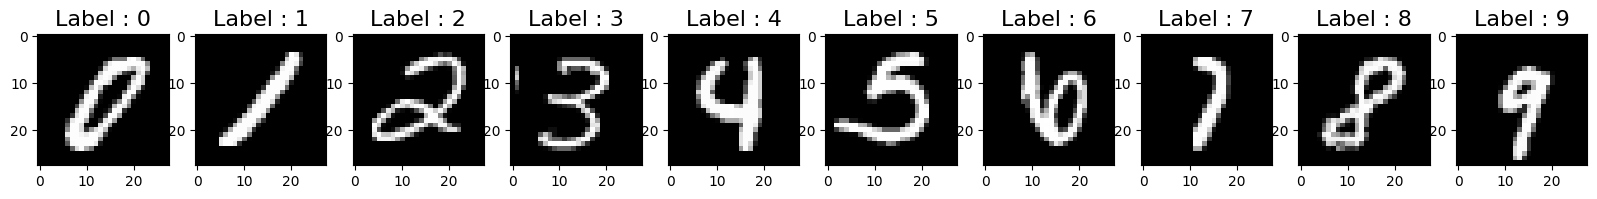

In [6]:
#Visualize examples
fig, ax = plt.subplots(1, 10, figsize=(20,20))

for i in range(10) :
    sample = df_train_images.loc[df_train_images["label"] == i]
    disp = ImageDisplay(sample)
    disp.display_image(ax[i], random.randint(0, len(sample) - 1))
    ax[i].set_title(f'Label : {i}', fontsize=16)

In [7]:
# Create format for table view in markdown
count_format = "# Repartition of each digits in dataset\n| Digits | Train | Test |\n"
count_format += "| :----- | :-------: | --------: |\n"

# Count the recurrence of each digit in the dataset
train_count_digits = [len(df_train[df_train.label == i]) for i in range(10)]
test_count_digits =  [len(df_test[df_test.label == i]) for i in range(10)]
for (index, train, test) in zip(range(10), train_count_digits, test_count_digits) :
    count_format += f'| {index} | {train} | {test} |\n'
display(Markdown(count_format))

# Repartition of each digits in dataset
| Digits | Train | Test |
| :----- | :-------: | --------: |
| 0 | 5923 | 980 |
| 1 | 6742 | 1135 |
| 2 | 5958 | 1032 |
| 3 | 6131 | 1010 |
| 4 | 5842 | 982 |
| 5 | 5421 | 892 |
| 6 | 5918 | 958 |
| 7 | 6265 | 1028 |
| 8 | 5851 | 974 |
| 9 | 5949 | 1009 |


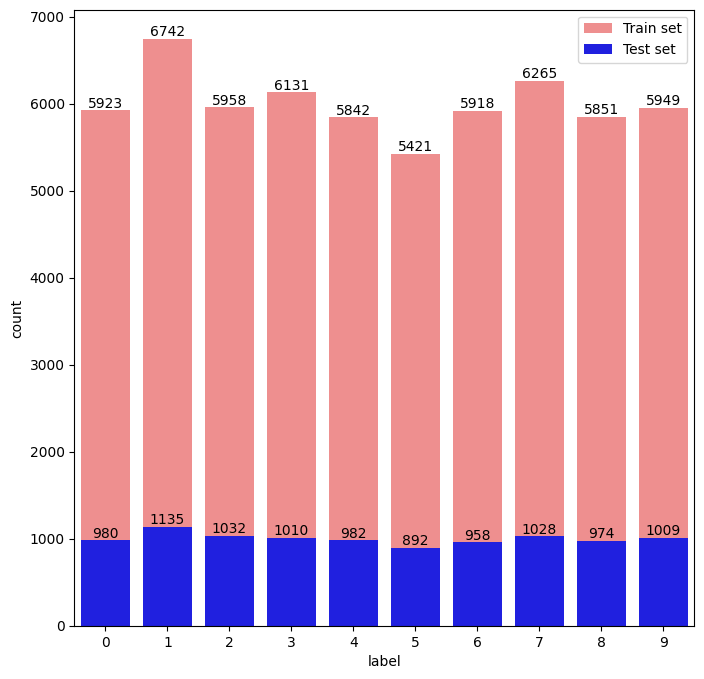

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(df_train, color='r', label='Train set', x="label", alpha=0.5)
sns.countplot(df_test, color='b', label='Test set', x="label")
ax.set_xticks(range(10), labels=map(str, range(10)))

plt.legend()
for i in ax.containers:
    ax.bar_label(i,)

In [13]:
# Calculate the mean of the digits

digits_means = [
    [
        np.matrix(np.reshape(row['image'], (28, 28))).mean()
        for index, row in df_train_images.loc[df_train_images['label'] == i].iterrows()]
        for i in range(10)]

df_digits_means = pd.DataFrame({
    "label": range(10),
    "mean": digits_means
})
full_digits_means = [ np.matrix(np.reshape(row['image'], (28, 28))).mean()
    for index, row in df_train_images.iterrows()
]


In [25]:
df_train_images["mean"] = full_digits_means
# Create format for table view in markdown
mean_format = "# Quantiles of mean of images matrixes\n| Digits | 1rst quantile | Median | 3rd quantile\n"
mean_format += "| :----- | :-------: | :--------: | ----------: |\n"
for i in range(10) :
    quantiles = df_train_images.loc[df_train_images['label'] == i]['mean'].quantile([0.25, 0.5, 0.75])
    mean_format += f'| {i} | {round(quantiles[0.25], 2)} | {round(quantiles[0.5], 2)} | {round(quantiles[0.75], 2)} |\n'


display(Markdown(mean_format))


# Quantiles of mean of images matrixes
| Digits | 1rst quantile | Median | 3rd quantile
| :----- | :-------: | :--------: | ----------: |
| 0 | 36.619260204081634 | 43.79974489795919 | 50.90688775510204 |
| 1 | 15.35969387755102 | 18.667729591836736 | 22.65752551020408 |
| 2 | 31.024553571428573 | 37.50701530612245 | 44.29017857142857 |
| 3 | 29.23469387755102 | 35.43112244897959 | 42.20599489795919 |
| 4 | 24.987244897959183 | 30.07780612244898 | 36.071109693877546 |
| 5 | 26.0140306122449 | 31.957908163265305 | 38.60204081632653 |
| 6 | 28.199936224489797 | 34.10267857142857 | 40.76881377551021 |
| 7 | 23.540816326530614 | 28.418367346938776 | 34.03061224489796 |
| 8 | 31.182397959183675 | 37.410714285714285 | 44.33418367346939 |
| 9 | 25.417091836734695 | 30.383928571428573 | 36.0905612244898 |


In [37]:
print(df_digits_means.loc[df_digits_means['label']== 0])
#print([sum(df_digits_means.loc[i, "mean"])/len(df_digits_means.loc[i, "mean"]) for i in range(10)])

   label                                               mean
0      0  [39.661989795918366, 45.19515306122449, 46.565...
